## CS 273P Homework #3 (16th April 2019)

## Sandhya Chandramohan (Student ID: 61167891)


### 1: Logistic Regression

1.) For the first dataset XA,YA class 0 vs 1 is plotted, colored according to their target values in the last column in the iris dataset. Similarly, for the second dataset XB, YB class 1 vs 2 is plotted, colored according to their target values in last column in the iris dataset.

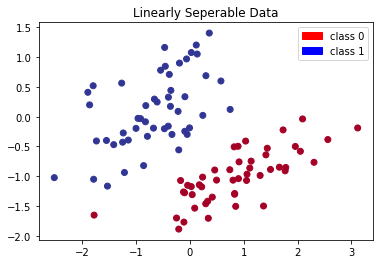

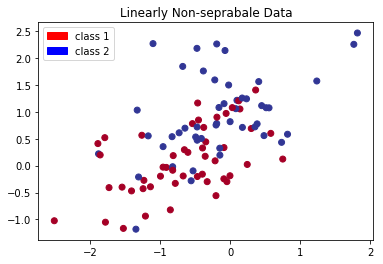

In [209]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from logisticClassify2 import *
import mltools as ml
import warnings
import sys
warnings.filterwarnings('ignore')
%matplotlib inline
plt.set_cmap('RdYlBu')

iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1]                  # get first two features & target
X, Y = ml.shuffleData(X, Y)                     # reorder randomly (important later)
X, params = ml.rescale(X)                       # works much better on rescaled data
XA, YA = X[Y<2,:], Y[Y<2]                       # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0]                       # get class 1 vs 2

plt.title('Linearly Seperable Data')
plt.scatter(XA[:, 0], XA[:, 1], c = YA)
red_patch = mpatches.Patch(color='red', label='class 0')
blue_patch = mpatches.Patch(color='blue', label='class 1')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

plt.title('Linearly Non-seprabale Data')
plt.scatter(XB[:, 0], XB[:, 1], c = YB)
red_patch = mpatches.Patch(color='red', label='class 1')
blue_patch = mpatches.Patch(color='blue', label='class 2')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

2.) The following lines of code were added to fill in the `plotBoundary` function in `logisticClassify2.py`:

`x2b = -1*(self.theta[0]+self.theta[1]*x1b)/self.theta[2];`

The value of x2b is set to the gradient for the decision boundary defined by decision boundary defined by theta0 + theta1 X1 + theta2 X2 = 0. Following this, the logistic classifier is initialized as a learner, assigned class labels, and unique weights and the decision boundary plotted for datasets A and B in order. The weights assigned in this case are 0.5, -0.25 and 1 for theta0, theta1 and theta2 respectively.


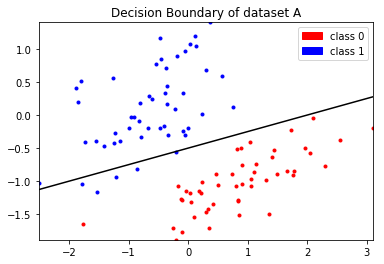

In [210]:
learner = logisticClassify2()          # Initializing the logistic classifier
learner.classes = np.unique(YA)        # Picking unique values as the class labels
wts = np.array([0.5,-0.25,1]);         # Assigning weights
learner.theta=wts
plt.title('Decision Boundary of dataset A')
red_patch = mpatches.Patch(color='red', label='class 0')
blue_patch = mpatches.Patch(color='blue', label='class 1')
plt.legend(handles=[red_patch, blue_patch])
learner.plotBoundary(XA, YA)           # Plotting decision boundary

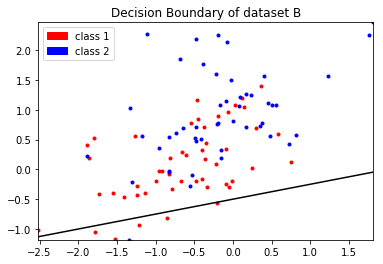

In [211]:
# Performing above actions for the XB-YB split of the data
learner = logisticClassify2()
learner.classes = np.unique(YB)
wts = np.array([0.5,-0.25,1]);
learner.theta=wts
plt.title('Decision Boundary of dataset B')
red_patch = mpatches.Patch(color='red', label='class 1')
blue_patch = mpatches.Patch(color='blue', label='class 2')
plt.legend(handles=[red_patch, blue_patch])
learner.plotBoundary(XB, YB)

3.) We make predictions on our classifier for datasets A and B respectively and calculate the training error rate on them using the Mean squared error formula `trainErr = np.sum((YPred - Y) ** 2)/YPred.shape[0]`. We note that the error rate on one dataset (A) is `0.050505` as expected while the error rate on the other (dataset B) is higher, about `0.464646`.

In [212]:
# Predicting for our classifier and computing the training error rate
learner.classes = np.unique(YA)
YPredA = learner.predict(XA)
trainErrA = np.sum((YPredA - YA) ** 2)/YPredA.shape[0]
print ("Training Error Rate on Dataset A\t=", trainErrA)

learner.classes = np.unique(YB)
YPredB = learner.predict(XB)
trainErrB = np.sum((YPredB - YB) ** 2)/YPredB.shape[0]
print ("Training Error Rate on Dataset B\t=", trainErrB)

Training Error Rate on Dataset A	= 0.050505050505050504
Training Error Rate on Dataset B	= 0.46464646464646464


4.) We generate boundary plots on datasets A and B using `plotClassify2D` using the manually constructed learner.
We note that the boundary is the same as the one generated by us analytically.

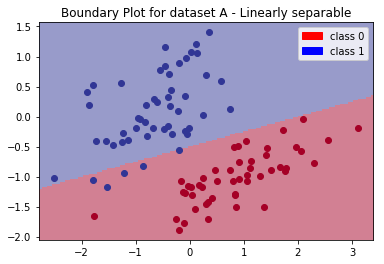

In [213]:
learner.classes = np.unique(YA)
ml.plotClassify2D(learner, XA, YA)
plt.title('Boundary Plot for dataset A - Linearly separable')
red_patch = mpatches.Patch(color='red', label='class 0')
blue_patch = mpatches.Patch(color='blue', label='class 1')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

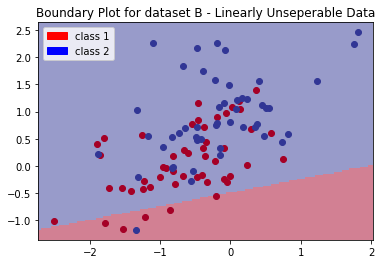

In [214]:
learner.classes = np.unique(YB)
ml.plotClassify2D(learner, XB, YB)
plt.title('Boundary Plot for dataset B - Linearly Unseperable Data')
red_patch = mpatches.Patch(color='red', label='class 1')
blue_patch = mpatches.Patch(color='blue', label='class 2')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

5.) The derivate of the Negative log likelihood and the derivate equations are as follows:
![title](hw3.png)

6.) The complete implementation of the train function is as follows:
```python
def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None, regularization=False, alpha=2):
        """ Train the logistic regression using stochastic gradient descent """
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[];
        while not done:
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1;
            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                ri = XX[i].dot(self.theta);
                if ri > 0:
                    signi = 1 / (1 + np.exp(-ri))
                else:
                    signi = np.exp(ri) / (1 + np.exp(ri))
                if YY[i]:
                    gradi = -(1-signi) * XX[i,:];
                else:
                    gradi = signi * XX[i,:];
                if regularization:
                    gradi += 2*alpha*self.theta;
                self.theta -= stepsize * gradi;

            J01.append( self.err(X,Y) )

            Sign = [];
            for x in XX:
                r = x.dot(self.theta);
                if r > 0:
                    Sign.append(1 / (1 + np.exp(-r)));
                else:
                    Sign.append(np.exp(r) / (1 + np.exp(r)));
            Sign = np.array(Sign);                   
            
            J_sum = 0;
            count = 0;
            for s in Sign:
                if (abs(1-s) < 1e-6):
                    J_sum += YY[int(count)]*np.log(s);
                elif (abs(s) < 1e-6):
                    J_sum += (1-YY[int(count)])*np.log(1-s);
                else:
                    J_sum += (YY[int(count)]*np.log(s)+(1-YY[int(count)])*np.log(1-s));
                count += 1;
            J_sum = -J_sum / len(YY);
            Jnll.append( Jsur )
            done = (epoch > stopEpochs) or (epoch>1 and abs(Jnll[-1]-Jnll[-2])<stopTol);
        # plot
        self.numberOfIterations = epoch
        if self.plotFlag:
            plt.semilogx(range(epoch), np.abs(Jnll), label='Surrogate Loss')
            plt.semilogx(range(epoch), np.abs(J01), label='Error Rate')
            plt.legend(loc='upper right')
            plt.xlabel('# of iterations')
            plt.ylabel('Losses')
            plt.show()
```

7.) We run train our logistic regression classifier on both datasets A and B.  
After iteratively trying various stepsizes starting from 0.5. We find that the stepsize parameter basically controls the no. of iterations required to converge to the minima. We notice that when the stepsize (initStep parameter) is small, the no. of steps required to converge is high. The no. of steps required to converge decreases as the stepsize is increased. But when the stepsize is set to a very high number, then in that case, it is possible that the plot may not converge. In this case, for dataset A, from our observations, the ideal value of the stepsize is between 5 and 6. For dataset B, we observe that the plot does not converge for any value of stepsize and use a stepsize of 1.  
The first plot shows the convergence of the surrogate loss and the error rate.  
The second plot shows the final converged classifier with the data.


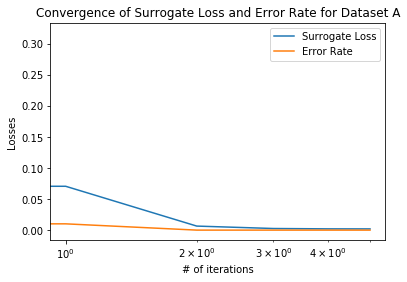

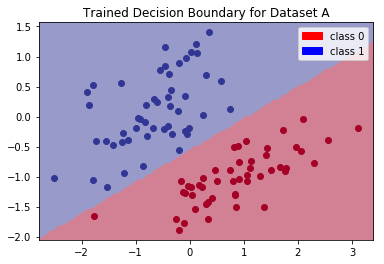

In [215]:
# Training logistic regression classifier with Dataset A
XA, YA = ml.shuffleData(XA, YA)
plt.title('Convergence of Surrogate Loss and Error Rate for Dataset A')
learner.classes = np.unique(YA)
learner.plotFlag = True
learner.train(XA,YA, initStep=6)
ml.plotClassify2D(learner, XA, YA)
plt.title('Trained Decision Boundary for Dataset A')
red_patch = mpatches.Patch(color='red', label='class 0')
blue_patch = mpatches.Patch(color='blue', label='class 1')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

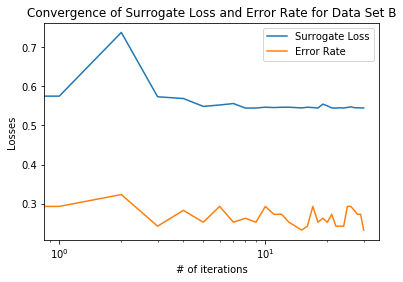

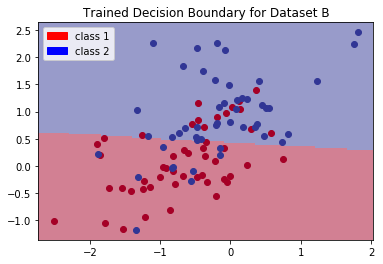

In [216]:
# Training logistic regression classifier with Dataset B
learner = logisticClassify2()
learner.classes = np.unique(YB)
XB, YB = ml.shuffleData(XB, YB)
plt.title('Convergence of Surrogate Loss and Error Rate for Data Set B')
learner.plotFlag = True
learner.train(XB,YB)
ml.plotClassify2D(learner, XB, YB)
plt.title('Trained Decision Boundary for Dataset B')
red_patch = mpatches.Patch(color='red', label='class 1')
blue_patch = mpatches.Patch(color='blue', label='class 2')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

8.) The definition of the `train` function in part 6, takes as input two arguments a boolean `regularization` variable which is set to default `false` and can be switched to `true` to train the classifier with regularization. It also takes as input the value of `alpha` for the regularization term.  
On running the logistic regression classifier with the L2 Ridge regularization term on dataset A, we observe that when the value of alpha is zero there is no difference between the plot and convergence without regularization. As the value of alpha is increased, the plots start to converge and achieve convergence at about a value of `alpha=1.27`.  
But as the value of alpha is further increased above `1.27`, the plots do not converge at anymore. This is because at higher values of alpha, it will add too much weight and will lead to under-fitting. For a value of `alpha=2` we observe that the plots do not converge at all.

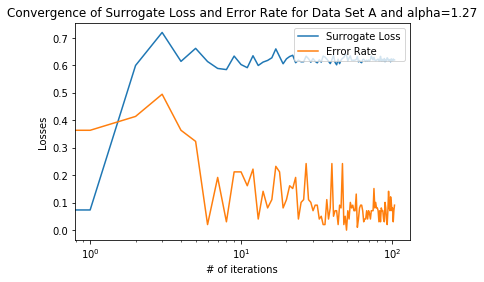

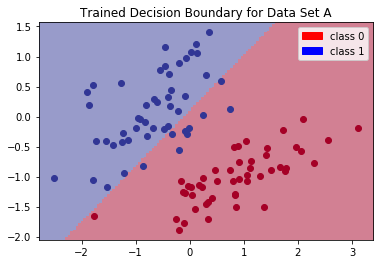

In [225]:
# Training logistic regression classifier with regularization for Dataset A and alpha=1.27
learner = logisticClassify2()
XA, YA = ml.shuffleData(XA, YA)
plt.title('Convergence of Surrogate Loss and Error Rate for Data Set A and alpha=1.27')
learner.plotFlag = True
learner.classes = np.unique(YA)
learner.train(XA, YA, regularization=True, alpha=1.27)
ml.plotClassify2D(learner, XA, YA)
plt.title('Trained Decision Boundary for Data Set A')
red_patch = mpatches.Patch(color='red', label='class 0')
blue_patch = mpatches.Patch(color='blue', label='class 1')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

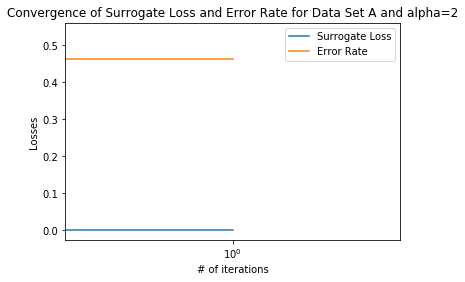

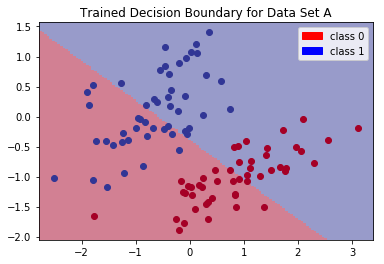

In [218]:
# Training logistic regression classifier with regularization for Dataset A and alpha=2
learner = logisticClassify2()
XA, YA = ml.shuffleData(XA, YA)
plt.title('Convergence of Surrogate Loss and Error Rate for Data Set A and alpha=2')
learner.plotFlag = True
learner.classes = np.unique(YA)
learner.train(XA, YA, regularization=True, alpha=2)
ml.plotClassify2D(learner, XA, YA)
plt.title('Trained Decision Boundary for Data Set A')
red_patch = mpatches.Patch(color='red', label='class 0')
blue_patch = mpatches.Patch(color='blue', label='class 1')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

### Problem 2: Shattering and VC Dimension 

1.) The first function is a line parallel to the y-axis. And as such can shatter the configuration of two points in Figure 1(b) in all possible binary colorings. Therefore, the VC dimension of the first function is atleast 2. Also, a line parallel to the y-axis can not shatter the configuration of 3 points in Figure 1(c).  
Therefore, the VC dimension of this function is 2. And it can shatter datasets in Figure 1(a) and Figure 1(b).


2.) The second function is a line passing through the origin. And as such can shatter the configuration of two points in Figure 1(b) in all possible binary colorings. Therefore, the VC dimension of the second function is atleast 2. Also, a line passing through the origin can not shatter the configuration of 3 points in Figure 1(c).  
Therefore, the VC dimension of this function is 2. And it can shatter datasets in Figure 1(a) and Figure 1(b).


3.) The third function is a circle centred at coordinates (a,b). And as such can shatter the configuration of three points in Figure 1(c) in all possible binary colorings. Therefore, the VC dimension of the third function is atleast 3. Also, a circle centred at coordinates (a,b) can not shatter the configuration of 4 points in Figure 1(d).  
Therefore, the VC dimension of this function is 3. And it can shatter datasets in Figure 1(a), Figure 1(b) and Figure 1(c).


4.) The fourth function is two parallel lines with the same slope and different intercepts. And as such can shatter the configuration of four points in Figure 1(d) in all possible binary colorings. Therefore, the VC dimension of the fourth function is atleast 4. Also, two parallel lines with the same slope and different intercepts can not shatter the configuration of 5 points.  
Therefore, the VC dimension of this function is 4. And it can shatter datasets in Figure 1(a), Figure 1(b), Figure 1(c) and Figure 1(d).

### Statement of Collaboration

I completed this assignment on my own, without any collaboration with fellow students. I referred to discussions on Piazza to clear any doubts before starting on the project. After starting the assignment, I kept track of any clarifications made on Piazza to ensure nothing was missed by me.